## ML techniques:
- The Regression/Estimation: predicting continuous values
- Classification: predicting the item class/category of a case
- Clustering: finding the structure of data; summarization
- Associations: Associating frequent co-occurring items/events
- Anomaly detection: discovering abnormal and unusual cases
- Sequence mining: predicting next events; click-stream (Markov Model, HMM)
- Dimension reduction: reducing the size of data (PCA)
- Recommendation systems: recommending items

## Difference in AI, ML, DL?

## Python for Machine Learning

- numpy 
- pandas
- matplotlib
- scipy
- scikit learn

## Supervised vs Unsupervised
- labelled vs unlabelled data

In [1]:
import pandas as pd
import numpy as np

cancer_data = pd.read_csv("data/cancer_data.csv")

In [2]:
cancer_data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
284,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.0958,0.11150,0.03390,...,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.1017,0.1999,0.07127,NaN
73,859983,M,13.80,15.79,90.43,584.1,0.10070,0.1280,0.07789,0.05069,...,20.86,110.30,812.4,0.14110,0.3542,0.2779,0.1383,0.2589,0.10300,NaN
435,908489,M,13.98,19.62,91.12,599.5,0.10600,0.1133,0.11260,0.06463,...,30.80,113.90,869.3,0.16130,0.3568,0.4069,0.1827,0.3179,0.10550,NaN
162,871201,M,19.59,18.15,130.70,1214.0,0.11200,0.1666,0.25080,0.12860,...,26.39,174.90,2232.0,0.14380,0.3846,0.6810,0.2247,0.3643,0.09223,NaN
432,908194,M,20.18,19.54,133.80,1250.0,0.11330,0.1489,0.21330,0.12590,...,25.07,146.00,1479.0,0.16650,0.2942,0.5308,0.2173,0.3032,0.08075,NaN


2 types of supervised techniques: classification and regression

In [3]:
cancer_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
cancer_data["diagnosis"] = cancer_data["diagnosis"].astype("category")

In [5]:
cancer_data.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [6]:
cancer_data.columns[2:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# example

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [8]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

# !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

In [9]:
df = pd.read_csv("data/FuelConsumption.csv")

In [10]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


- independent variable (x): EngineSize, "causes" or "states" explanatory variables
- dependent variable (y): co2emission, "target" or "final state" we try to predict 

A regression model relates y, or the dependent variable, to a function of x, i.e., the independent
variables.

- You count discreate data.
- You measure continuous data.
- Bar charts to graph discreate data. 
- Histograms and scatterplots to graph continuous data.

In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [12]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


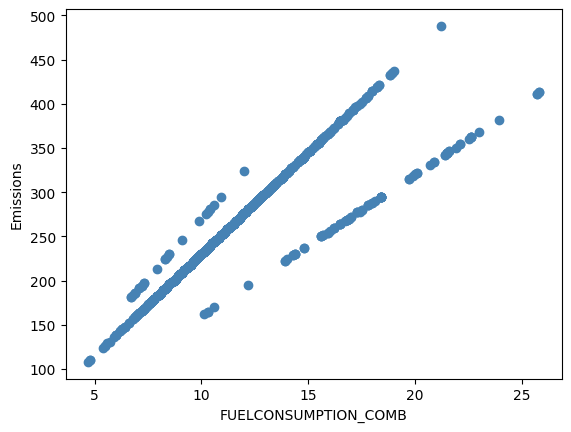

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

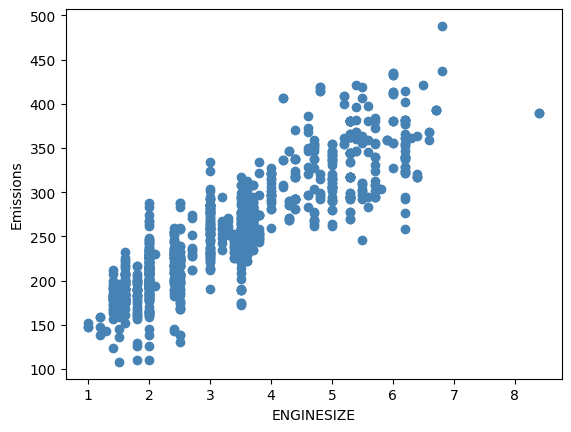

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [15]:
import seaborn as sns

In [16]:
sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

- residual error

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [19]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

# Simple regression formula
y ̂ = θ0 + θ1 * x1

y = a + b * x
y = intercept + slope * x

CO2EMISSIONS = regr.intercept_ + regr.coef_ * ENGINESIZE 

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

Text(38.347222222222214, 0.5, 'Emission')

## Model evaluation metrics:
- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

minimize residual error

In [21]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [22]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 324.96
Residual sum of squares (MSE): 113975.81
R2-score: -26.35


### multiple lineer regression formula:
y ̂ = θ0 + θ1 * x1 + θ2 * x2 + ... + θn * xn

In [23]:
regr = linear_model.LinearRegression()

ndf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8
train = ndf[msk]
test = ndf[~msk]

x = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

regr.fit(x, y)

LinearRegression()

In [24]:
print('Coefficients:', regr.coef_)

Coefficients: [[15.53171795 -2.39238862]]


In [25]:
y_hat = regr.predict(np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]))
x = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error (MSE) : %.5f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.5f' % regr.score(x, y))


Mean Squared Error (MSE) : 757.91832
Variance score: 0.82456


## Evaluation Metrics in Regression

### Mean Absolute Error (MAE)

In [26]:
import numpy as np

expected = [1.0] * 11

predicted = [round(1.0 - i * 0.1, 1) for i in range(11)]

In [27]:
print("real values:", expected)
print("predicted values:", predicted)

real values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
predicted values: [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(expected, predicted)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.5


In [29]:
errors = []
for i in range(len(expected)):
    error = abs(expected[i] - predicted[i])
    errors.append(error)
    print(f"{expected[i]} - {predicted[i]} - {error:.2f}")

1.0 - 1.0 - 0.00
1.0 - 0.9 - 0.10
1.0 - 0.8 - 0.20
1.0 - 0.7 - 0.30
1.0 - 0.6 - 0.40
1.0 - 0.5 - 0.50
1.0 - 0.4 - 0.60
1.0 - 0.3 - 0.70
1.0 - 0.2 - 0.80
1.0 - 0.1 - 0.90
1.0 - 0.0 - 1.00


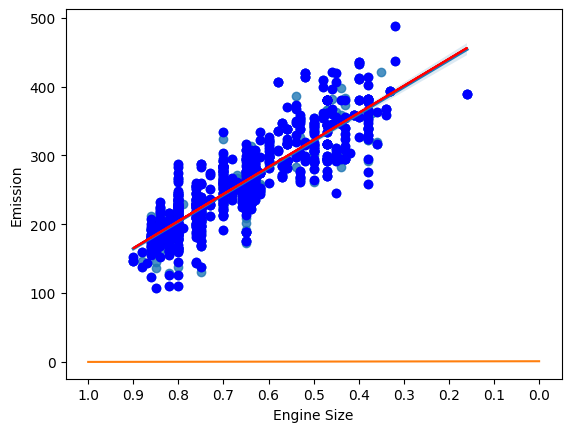

In [30]:
from matplotlib import pyplot
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.plot(errors)
pyplot.show()

## Mean Squared Error (MSE)

In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(expected, predicted)
print("MSE:", mse)

MSE: 0.35000000000000003


In [32]:
errors = []
for i in range(len(expected)):
    error = (expected[i] - predicted[i])**2
    errors.append(error)
    print(f"{expected[i]} - {predicted[i]} - {error:.2f}")

1.0 - 1.0 - 0.00
1.0 - 0.9 - 0.01
1.0 - 0.8 - 0.04
1.0 - 0.7 - 0.09
1.0 - 0.6 - 0.16
1.0 - 0.5 - 0.25
1.0 - 0.4 - 0.36
1.0 - 0.3 - 0.49
1.0 - 0.2 - 0.64
1.0 - 0.1 - 0.81
1.0 - 0.0 - 1.00


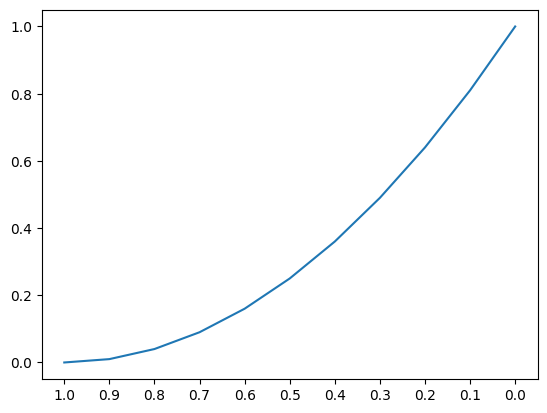

In [33]:
from matplotlib import pyplot
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.plot(errors)
pyplot.show()

## Root Mean Squared Error (RMSE)

In [34]:
rmse = np.sqrt(mean_squared_error(expected, predicted))
print("RMSE:", rmse)

RMSE: 0.5916079783099616


In [35]:
from sklearn.metrics import root_mean_squared_error

# deprecated
# rmse_old = mean_squared_error(expected, predicted, squared=False)
# print("RMSE old:", rmse_old)

rmse = root_mean_squared_error(expected, predicted)
print("RMSE:", rmse)

RMSE: 0.5916079783099616


In [36]:
# Relative Absolute Error (RAE)
# Relative Squared Error (RSE)

In [37]:
# R-squared (r2) Score

In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(expected, predicted)
print("R-squared Score:", r2)

R-squared Score: 0.0


https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/